<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/ANN_with_fashion_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
classes = ['T-shirt/top', '	Trouser', 'Pullover', '	Dress', '	Coat',  ' Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

5
 Sandal


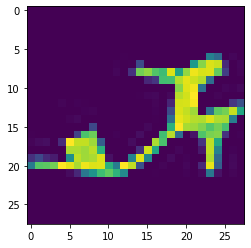

In [4]:
import random 

random_ind = random.randint(0, 60001)

plt.imshow(X_train[random_ind])
print(y_train[random_ind])
print(classes[y_train[random_ind]])

In [5]:
X_train.max(), X_train.min()

(255, 0)

In [6]:
y_train.max(), y_train.min() #10 classes

(9, 0)

In [7]:
X_test = X_test.copy()
X_test.shape

(10000, 28, 28)

## Preprocessing

In [8]:
# Standardizing
X_train = X_train/255
X_test = X_test/255

In [9]:
# Reshaping
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

In [10]:
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

## Model

In [11]:
input = Input((784, ))

dense = Dense(128, activation = 'relu')

x = dense(input)
x = tf.keras.layers.Dropout(0.2) (x)

output = Dense(10, activation = 'softmax') (x)

model = Model(inputs = input, outputs = output, name = "Fashion_mnist_model")

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',  metrics = ['categorical_accuracy'])

model.summary()

Model: "Fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Callbacks
# Early Stopping
es_callback = EarlyStopping(monitor = 'loss', min_delta = 0.4, patience = 10)

# Learning Rate Scheduler 
def scheduler(epoch, lr):
  if epoch < 20:
    return lr
  else:
    lr * tf.math.exp(-0.1)

lr_callback = LearningRateScheduler(scheduler)

In [13]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, callbacks = [es_callback, lr_callback])

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5346 - categorical_accuracy: 0.8104 - val_loss: 0.4367 - val_categorical_accuracy: 0.8395 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4030 - categorical_accuracy: 0.8531 - val_loss: 0.4057 - val_categorical_accuracy: 0.8528 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3707 - categorical_accuracy: 0.8638 - val_loss: 0.3640 - val_categorical_accuracy: 0.8688 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3481 - categorical_accuracy: 0.8720 - val_loss: 0.3760 - val_categorical_accuracy: 0.8631 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3324 - categorical_accuracy: 0.8781 - val_loss: 0.3664 - val_categorical_accuracy: 0.8648 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3195 - cat

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3432 - categorical_accuracy: 0.8815


[0.3431946039199829, 0.8815000057220459]

## Predictions

In [15]:
preds = model.predict(X_test)

In [22]:
# Call this cell over and over again 
import random 

i = random.randint(0, 10001)

print(classes[y_test[i].argmax()])
print(classes[preds[i].argmax()])

	Dress
	Dress


## Saving

In [17]:
model.save('fashion_mnist_model')

INFO:tensorflow:Assets written to: fashion_mnist_model/assets


In [18]:
new_model = tf.keras.models.load_model('fashion_mnist_model')

In [20]:
new_model_preds = new_model.predict(X_test)

In [23]:
import random 

i = random.randint(0, 10001)

print(classes[y_test[i].argmax()])
print(classes[new_model_preds[i].argmax()])

	Trouser
	Trouser
